In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
# 請使用sklearn.datasets.load_digits()
(X_train, y_train), (X_test, y_test) = mnist.load_data() # <------------------------


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/1 #255
x_Test_norm = X_test_2D/1   #255

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 1s - loss: 2.8892 - accuracy: 0.8227 - val_loss: 0.6028 - val_accuracy: 0.8921
Epoch 2/50
 - 1s - loss: 0.4184 - accuracy: 0.9123 - val_loss: 0.3632 - val_accuracy: 0.9221
Epoch 3/50
 - 1s - loss: 0.2461 - accuracy: 0.9358 - val_loss: 0.3002 - val_accuracy: 0.9317
Epoch 4/50
 - 1s - loss: 0.1783 - accuracy: 0.9506 - val_loss: 0.2608 - val_accuracy: 0.9355
Epoch 5/50
 - 1s - loss: 0.1388 - accuracy: 0.9594 - val_loss: 0.2369 - val_accuracy: 0.9468
Epoch 6/50
 - 1s - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.2367 - val_accuracy: 0.9426
Epoch 7/50
 - 1s - loss: 0.1027 - accuracy: 0.9679 - val_loss: 0.2286 - val_accuracy: 0.9491
Epoch 8/50
 - 1s - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.2380 - val_accuracy: 0.9484
Epoch 9/50
 - 1s - loss: 0.0827 - accuracy: 0.9739 - val_loss: 0.2230 - val_accuracy: 0.9507
Epoch 10/50
 - 1s - loss: 0.0792 - accuracy: 0.9746 - val_loss: 0.2441 - val_accuracy: 0.9487
Epoch 11/50
 - 1s -

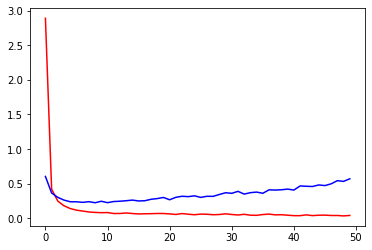

In [5]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

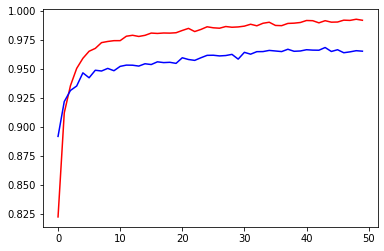

In [6]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [3]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


60000/60000 [==============================] - 2s 35us/step

	[Info] Accuracy of training data = 98.7%


In [4]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 0s 36us/step

	[Info] Accuracy of testing data = 96.2%
